In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [3]:
# Load MNIST data
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and flatten data
x_train_flat = x_train.reshape(len(x_train), 28*28) / 255.0
x_test_flat = x_test.reshape(len(x_test), 28*28) / 255.0

In [ ]:
# Build model's architecture 
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(784,), activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\Yugesh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Train with more epochs
model.fit(x_train_flat, y_train, 
            epochs=12, 
            batch_size=32,
            validation_data=(x_test_flat, y_test),
            verbose=1)

# Test accuracy
test_loss, test_acc = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Final test accuracy: {test_acc:.4f}")


Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7950 - loss: 0.6452 - val_accuracy: 0.9584 - val_loss: 0.1404
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9486 - loss: 0.1827 - val_accuracy: 0.9734 - val_loss: 0.0935
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9600 - loss: 0.1391 - val_accuracy: 0.9728 - val_loss: 0.0916
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9659 - loss: 0.1200 - val_accuracy: 0.9740 - val_loss: 0.0931
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9722 - loss: 0.0975 - val_accuracy: 0.9782 - val_loss: 0.0770
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9734 - loss: 0.0914 - val_accuracy: 0.9793 - val_loss: 0.0732
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9767 - loss: 0.0814 - val_accuracy: 0.9791 - val_loss: 0.0736
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9788 - loss: 0.0751 - 

### Try to predict with a image

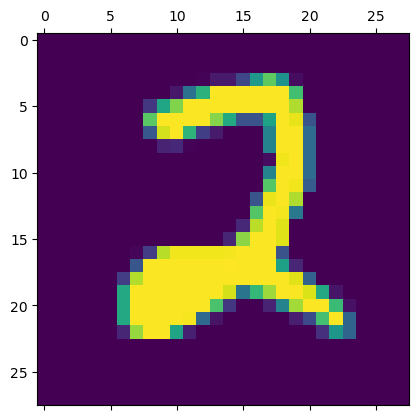

In [18]:
import matplotlib.pyplot as plt
plt.matshow(x_test[82])

In [19]:
image_data = x_test_flat[82]

In [20]:
# Convert to numpy array
image_array = np.array(image_data, dtype=np.float32).reshape(28, 28)
# Reshape for model input
image_array = image_array.reshape(1, 784)

In [21]:
# Make prediction
predictions = model.predict(image_array, verbose=0)
predicted_digit = int(np.argmax(predictions[0]))
confidence = float(np.max(predictions[0]) * 100)

print(f"Predicted: {predicted_digit}, Confidence: {confidence:.1f}%")
print(f"All probabilities: {[f'{p:.3f}' for p in predictions[0]]}")

Predicted: 2, Confidence: 100.0%
All probabilities: ['0.000', '0.000', '1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']


The above model is sufficient for basic predictions since the dataset was specifically designed for this task. However, in real-world scenarios, additional preprocessing is often required before feeding data into the model to achieve more accurate and reliable predictions.

In [ ]:

# Center the digit using center of mass
if np.sum(image_array) > 0:
    # Find center of mass
    y_coords, x_coords = np.where(image_array > 0.1)
    if len(x_coords) > 0 and len(y_coords) > 0:
        center_x = int(np.mean(x_coords))
        center_y = int(np.mean(y_coords))
        
        # Calculate shift to center (14,14 is center of 28x28)
        shift_x = 14 - center_x
        shift_y = 14 - center_y
        
        # Create centered image
        centered_image = np.zeros((28, 28))
        for y in range(28):
            for x in range(28):
                new_y = y - shift_y
                new_x = x - shift_x
                if 0 <= new_y < 28 and 0 <= new_x < 28:
                    centered_image[y, x] = image_array[new_y, new_x]
        
        image_array = centered_image

# Normalize intensity
if np.max(image_array) > 0:
    image_array = image_array / np.max(image_array)

# Apply slight Gaussian blur for smoothing
from scipy.ndimage import gaussian_filter
image_array = gaussian_filter(image_array, sigma=0.5)

# Reshape for model input
image_array = image_array.reshape(1, 784)

print(f"Image shape: {image_array.shape}")
print(f"Image min/max: {image_array.min():.3f}/{image_array.max():.3f}")

# Make prediction
predictions = model.predict(image_array, verbose=0)
predicted_digit = int(np.argmax(predictions[0]))
confidence = float(np.max(predictions[0]) * 100)

print(f"Predicted: {predicted_digit}, Confidence: {confidence:.1f}%")
print(f"All probabilities: {[f'{p:.3f}' for p in predictions[0]]}")


Image shape: (1, 784)
Image min/max: 0.000/0.990
Predicted: 0, Confidence: 100.0%
All probabilities: ['1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']
